<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Webtoon_Comics_Sentiments_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
from textblob import TextBlob
from wordcloud import WordCloud
import re
import string
string.punctuation
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Webtoon%20Dataset.csv'
comic = pd.read_csv(url,error_bad_lines=False)

In [3]:
comic.head()

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
0,0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,9.62,4.2M,"She's young, single and about to achieve her d...",UP EVERY TUESDAY,https://www.webtoons.com/en/romance/letsplay/l...
1,1,True Beauty,Yaongyi,39.9M,Romance,9.60,6.4M,"After binge-watching beauty videos online, a s...",UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/truebeauty...
2,2,Midnight Poppy Land,Lilydusk,10.4M,Romance,9.81,2.1M,After making a grisly discovery in the country...,UP EVERY SATURDAY,https://www.webtoons.com/en/romance/midnight-p...
3,3,Age Matters,Enjelicious,25.9M,Romance,9.79,3.5M,She's a hopeless romantic who's turning 30's ...,UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/age-matter...
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.9M,Supernatural,9.85,1.5M,When vampires destroy her chance to have the n...,UP EVERY THURSDAY,https://www.webtoons.com/en/supernatural/unhol...


In [5]:
comic.shape

(569, 10)

In [4]:
comic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            569 non-null    int64  
 1   Name          569 non-null    object 
 2   Writer        568 non-null    object 
 3   Likes         569 non-null    object 
 4   Genre         569 non-null    object 
 5   Rating        569 non-null    float64
 6   Subscribers   569 non-null    object 
 7   Summary       569 non-null    object 
 8   Update        569 non-null    object 
 9   Reading Link  569 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 44.6+ KB


In [6]:
comic.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,284.000000,164.400426,0.00,142.00,284.00,426.00,568.00
Rating,569.0,9.418998,0.557571,5.41,9.31,9.58,9.73,9.93


In [7]:
#selection data
df1 = comic[['Rating', 'Genre', 'Summary']]
df1.head()

,Rating,Genre,Summary
0,9.62,Romance,"She's young, single and about to achieve her d..."
1,9.60,Romance,"After binge-watching beauty videos online, a s..."
2,9.81,Romance,After making a grisly discovery in the country...
3,9.79,Romance,She's a hopeless romantic who's turning 30's ...
4,9.85,Supernatural,When vampires destroy her chance to have the n...


In [8]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df1['Clean_Summary'] = df1['Summary'].apply(lambda x:remove_punctuation(x))
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Rating,Genre,Summary,Clean_Summary
0,9.62,Romance,"She's young, single and about to achieve her d...",Shes young single and about to achieve her dre...
1,9.60,Romance,"After binge-watching beauty videos online, a s...",After bingewatching beauty videos online a shy...
2,9.81,Romance,After making a grisly discovery in the country...,After making a grisly discovery in the country...
3,9.79,Romance,She's a hopeless romantic who's turning 30's ...,Shes a hopeless romantic whos turning 30s and...
4,9.85,Supernatural,When vampires destroy her chance to have the n...,When vampires destroy her chance to have the n...


In [9]:
#setting lower case
df1['Summary_Lower'] = df1['Clean_Summary'].apply(lambda x: x.lower())
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rating,Genre,Summary,Clean_Summary,Summary_Lower
0,9.62,Romance,"She's young, single and about to achieve her d...",Shes young single and about to achieve her dre...,shes young single and about to achieve her dre...
1,9.60,Romance,"After binge-watching beauty videos online, a s...",After bingewatching beauty videos online a shy...,after bingewatching beauty videos online a shy...
2,9.81,Romance,After making a grisly discovery in the country...,After making a grisly discovery in the country...,after making a grisly discovery in the country...
3,9.79,Romance,She's a hopeless romantic who's turning 30's ...,Shes a hopeless romantic whos turning 30s and...,shes a hopeless romantic whos turning 30s and...
4,9.85,Supernatural,When vampires destroy her chance to have the n...,When vampires destroy her chance to have the n...,when vampires destroy her chance to have the n...


In [10]:
#defining function for tokenization
def tokenization(text):
    tokens = re.split('W+', text)
    return tokens

#applying function to the column
df1['Summary_Tokenied'] = df1['Summary_Lower'].apply(lambda x: tokenization(x))
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Rating,Genre,Summary,Clean_Summary,Summary_Lower,Summary_Tokenied
0,9.62,Romance,"She's young, single and about to achieve her d...",Shes young single and about to achieve her dre...,shes young single and about to achieve her dre...,[shes young single and about to achieve her dr...
1,9.60,Romance,"After binge-watching beauty videos online, a s...",After bingewatching beauty videos online a shy...,after bingewatching beauty videos online a shy...,[after bingewatching beauty videos online a sh...
2,9.81,Romance,After making a grisly discovery in the country...,After making a grisly discovery in the country...,after making a grisly discovery in the country...,[after making a grisly discovery in the countr...
3,9.79,Romance,She's a hopeless romantic who's turning 30's ...,Shes a hopeless romantic whos turning 30s and...,shes a hopeless romantic whos turning 30s and...,[shes a hopeless romantic whos turning 30s an...
4,9.85,Supernatural,When vampires destroy her chance to have the n...,When vampires destroy her chance to have the n...,when vampires destroy her chance to have the n...,[when vampires destroy her chance to have the ...


In [11]:
#stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [12]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
df1['No_Stopwords'] = df1['Summary_Tokenied'].apply(lambda x:remove_stopwords(x))
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Rating,Genre,Summary,Clean_Summary,Summary_Lower,Summary_Tokenied,No_Stopwords
0,9.62,Romance,"She's young, single and about to achieve her d...",Shes young single and about to achieve her dre...,shes young single and about to achieve her dre...,[shes young single and about to achieve her dr...,[shes young single and about to achieve her dr...
1,9.60,Romance,"After binge-watching beauty videos online, a s...",After bingewatching beauty videos online a shy...,after bingewatching beauty videos online a shy...,[after bingewatching beauty videos online a sh...,[after bingewatching beauty videos online a sh...
2,9.81,Romance,After making a grisly discovery in the country...,After making a grisly discovery in the country...,after making a grisly discovery in the country...,[after making a grisly discovery in the countr...,[after making a grisly discovery in the countr...
3,9.79,Romance,She's a hopeless romantic who's turning 30's ...,Shes a hopeless romantic whos turning 30s and...,shes a hopeless romantic whos turning 30s and...,[shes a hopeless romantic whos turning 30s an...,[shes a hopeless romantic whos turning 30s an...
4,9.85,Supernatural,When vampires destroy her chance to have the n...,When vampires destroy her chance to have the n...,when vampires destroy her chance to have the n...,[when vampires destroy her chance to have the ...,[when vampires destroy her chance to have the ...


In [13]:
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

df1['Summary_Stemmed'] = df1['No_Stopwords'].apply(lambda x: stemming(x))
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Rating,Genre,Summary,Clean_Summary,Summary_Lower,Summary_Tokenied,No_Stopwords,Summary_Stemmed
0,9.62,Romance,"She's young, single and about to achieve her d...",Shes young single and about to achieve her dre...,shes young single and about to achieve her dre...,[shes young single and about to achieve her dr...,[shes young single and about to achieve her dr...,[shes young single and about to achieve her dr...
1,9.60,Romance,"After binge-watching beauty videos online, a s...",After bingewatching beauty videos online a shy...,after bingewatching beauty videos online a shy...,[after bingewatching beauty videos online a sh...,[after bingewatching beauty videos online a sh...,[after bingewatching beauty videos online a sh...
2,9.81,Romance,After making a grisly discovery in the country...,After making a grisly discovery in the country...,after making a grisly discovery in the country...,[after making a grisly discovery in the countr...,[after making a grisly discovery in the countr...,[after making a grisly discovery in the countr...
3,9.79,Romance,She's a hopeless romantic who's turning 30's ...,Shes a hopeless romantic whos turning 30s and...,shes a hopeless romantic whos turning 30s and...,[shes a hopeless romantic whos turning 30s an...,[shes a hopeless romantic whos turning 30s an...,[shes a hopeless romantic whos turning 30s an...
4,9.85,Supernatural,When vampires destroy her chance to have the n...,When vampires destroy her chance to have the n...,when vampires destroy her chance to have the n...,[when vampires destroy her chance to have the ...,[when vampires destroy her chance to have the ...,[when vampires destroy her chance to have the ...


In [14]:
#selection data
df2 = df1[['Rating', 'Genre', 'Clean_Summary']]
df2.head()

,Rating,Genre,Clean_Summary
0,9.62,Romance,Shes young single and about to achieve her dre...
1,9.60,Romance,After bingewatching beauty videos online a shy...
2,9.81,Romance,After making a grisly discovery in the country...
3,9.79,Romance,Shes a hopeless romantic whos turning 30s and...
4,9.85,Supernatural,When vampires destroy her chance to have the n...


In [15]:
#create function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#apply function to data 
df2['Subjectivity'] = df2['Clean_Summary'].apply(getSubjectivity)
df2['Polarity'] = df2['Clean_Summary'].apply(getPolarity)
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Rating,Genre,Clean_Summary,Subjectivity,Polarity
0,9.62,Romance,Shes young single and about to achieve her dre...,0.568756,0.099867
1,9.60,Romance,After bingewatching beauty videos online a shy...,0.574074,-0.012963
2,9.81,Romance,After making a grisly discovery in the country...,0.566667,-0.250000
3,9.79,Romance,Shes a hopeless romantic whos turning 30s and...,0.680952,0.471429
4,9.85,Supernatural,When vampires destroy her chance to have the n...,0.450000,-0.125000


In [16]:
#create function to get sentiment data
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
#apply function to data
df2['Sentiment'] = df2['Polarity'].apply(getSentiment)
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Rating,Genre,Clean_Summary,Subjectivity,Polarity,Sentiment
0,9.62,Romance,Shes young single and about to achieve her dre...,0.568756,0.099867,Positive
1,9.60,Romance,After bingewatching beauty videos online a shy...,0.574074,-0.012963,Negative
2,9.81,Romance,After making a grisly discovery in the country...,0.566667,-0.250000,Negative
3,9.79,Romance,Shes a hopeless romantic whos turning 30s and...,0.680952,0.471429,Positive
4,9.85,Supernatural,When vampires destroy her chance to have the n...,0.450000,-0.125000,Negative


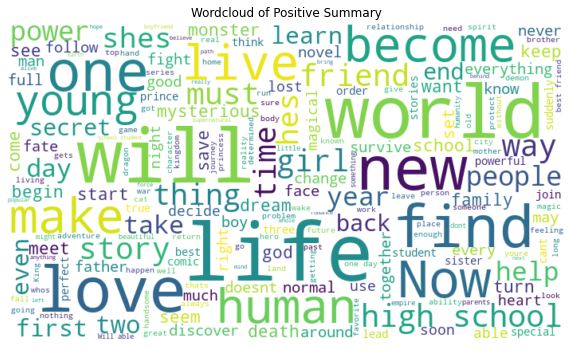

In [17]:
positive = " ".join(df2[df2.Sentiment == 'Positive']['Clean_Summary'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(positive)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Positive Summary")
plt.axis('off')
plt.show()

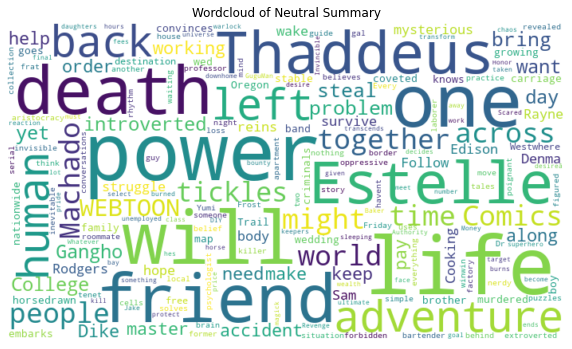

In [18]:
neutral = " ".join(df2[df2.Sentiment == 'Neutral']['Clean_Summary'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(neutral)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Neutral Summary")
plt.axis('off')
plt.show()

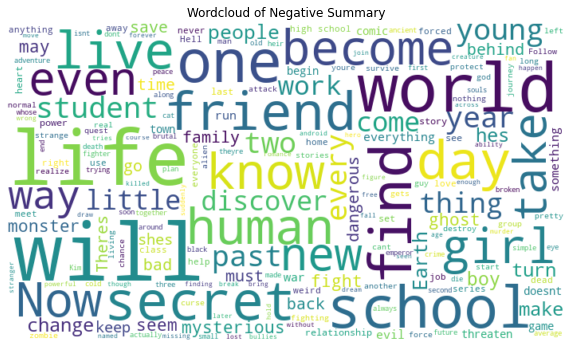

In [19]:
negative = " ".join(df2[df2.Sentiment == 'Negative']['Clean_Summary'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(negative)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Negative Summary")
plt.axis('off')
plt.show()

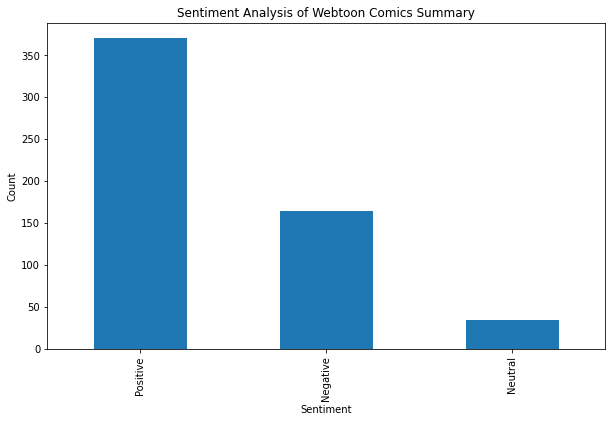

In [20]:
#visualize sentiment
df2['Sentiment'].value_counts()

plt.figure(figsize = (10,6))
plt.title("Sentiment Analysis of Webtoon Comics Summary")
plt.xlabel("Sentiment")
plt.ylabel("Count")

df2['Sentiment'].value_counts().plot(kind = 'bar')
plt.show()

In [21]:
#group genre & sentiment
genre_sentiment = df2.groupby(['Genre', 'Sentiment']).size().reset_index(name = 'Count')
print(genre_sentiment)

            Genre Sentiment  Count
0          Action  Negative     18
1          Action  Positive     29
2          Comedy  Negative     11
3          Comedy   Neutral      7
4          Comedy  Positive     34
5           Drama  Negative     15
6           Drama   Neutral      2
7           Drama  Positive     43
8         Fantasy  Negative     19
9         Fantasy   Neutral      3
10        Fantasy  Positive     73
11   Heartwarming  Negative      1
12   Heartwarming  Positive      1
13     Historical  Negative      2
14     Historical   Neutral      1
15     Historical  Positive      1
16         Horror  Negative      9
17         Horror  Positive     11
18    Informative   Neutral      4
19    Informative  Positive      1
20        Mystery  Negative      5
21        Mystery   Neutral      1
22        Mystery  Positive      3
23        Romance  Negative     27
24        Romance   Neutral      2
25        Romance  Positive     61
26         Sci-fi  Negative     10
27         Sci-fi   

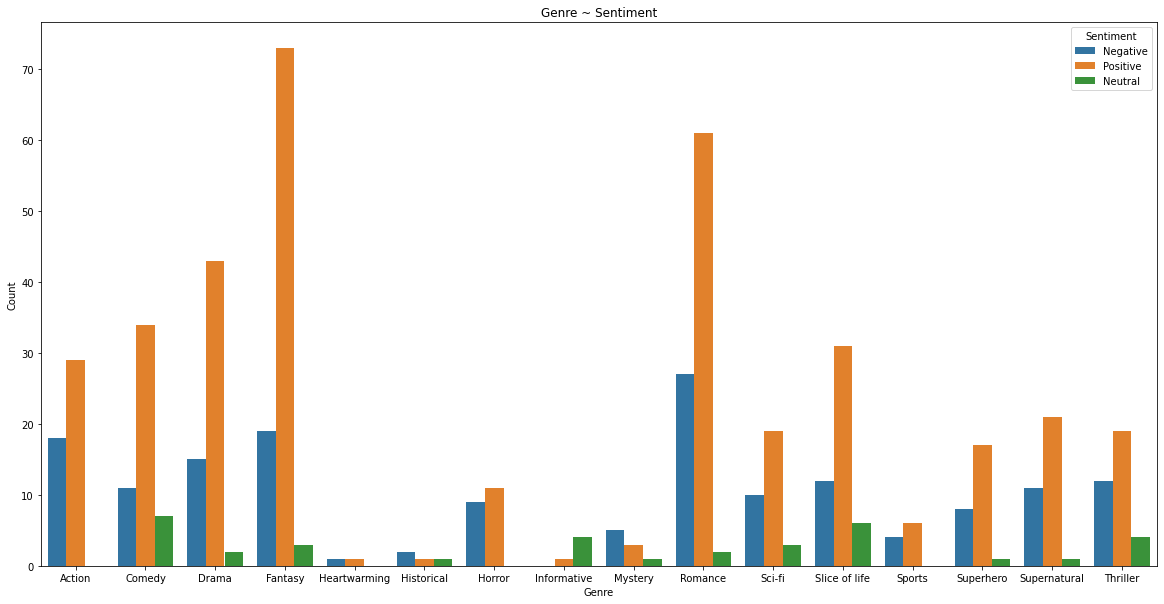

In [22]:
#visualize genre ~ sentiment
plt.figure(figsize = (20,10))
sns.barplot(x = 'Genre', y = 'Count', hue = 'Sentiment', data = genre_sentiment)
plt.title("Genre ~ Sentiment")
plt.show()

In [23]:
#seletion data
df3 = comic[['Name', 'Writer', 'Likes', 'Genre', 'Subscribers', 'Rating']]
df3.head()

,Name,Writer,Likes,Genre,Subscribers,Rating
0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,4.2M,9.62
1,True Beauty,Yaongyi,39.9M,Romance,6.4M,9.60
2,Midnight Poppy Land,Lilydusk,10.4M,Romance,2.1M,9.81
3,Age Matters,Enjelicious,25.9M,Romance,3.5M,9.79
4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.9M,Supernatural,1.5M,9.85


In [24]:
#handling categorical data
df3 = pd.get_dummies(df3, drop_first = True)
df3.head()

,Rating,Name_#Killstagram,Name_1000,Name_10th Dimension Boys,Name_1111 Animals,Name_2015: Space Series,Name_3-Second Strip,Name_A Bittersweet Life,Name_A Budgie's Life,Name_A Good Day to be a Dog,Name_A Man's Man,Name_A Summer Night's Dream,Name_A Useless Villain,Name_AXED,Name_About Death,Name_Acception,Name_Act Like You Love Me!,Name_Acursian,Name_Adamsville,Name_Adventures of God,Name_Aerial Magic,Name_After School Lessonsfor Unripe Apples,Name_Age Matters,Name_Aisopos,Name_Alice Elise,Name_All That We Hope to Be,Name_All That You Are,Name_All of Us Are Dead,Name_Always Human,Name_American Road Trip,Name_Andy Bass,Name_Annarasumanara,Name_Anti-Monster Force,Name_AntiSTALKER,Name_Aphrodite IX,Name_Apocalyptic Horseplay,Name_April Flowers,Name_Arma,Name_As Per Usual,Name_Assassin Roommate,...,Subscribers_841.1K,Subscribers_841.5K,Subscribers_844.1K,Subscribers_845.1K,Subscribers_85.4K,Subscribers_85K,Subscribers_86.3K,Subscribers_864.6K,Subscribers_869.3K,Subscribers_87.5K,Subscribers_87.6K,Subscribers_87.9K,Subscribers_88.3K,Subscribers_88.5K,Subscribers_88.8K,Subscribers_89.3K,Subscribers_90.5K,Subscribers_901.9K,Subscribers_91.8K,Subscribers_91.9K,Subscribers_919.5K,Subscribers_91K,Subscribers_93.3K,Subscribers_945.2K,Subscribers_95.1K,Subscribers_95.2K,Subscribers_966K,Subscribers_96K,Subscribers_97.4K,Subscribers_97.7K,Subscribers_97.9K,Subscribers_975.8K,Subscribers_979.7K,Subscribers_983.6K,Subscribers_987.3K,Subscribers_989.1K,Subscribers_99.4K,Subscribers_99.6K,Subscribers_990.4K,Subscribers_994.9K
0,9.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
#split data
X = df3.drop('Rating', axis = 1)
y = df3['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 1973)
(171, 1973)
(398,)
(171,)


In [26]:
linreg = LinearRegression()
model = %time linreg.fit(X_train, y_train)
print(model)

CPU times: user 180 ms, sys: 31.1 ms, total: 211 ms
Wall time: 139 ms
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [27]:
#prediction
y_pred = linreg.predict(X_test)
print(y_pred)

[ 9.551457    9.26791212  9.46666041  9.47533032  9.38360743  9.41724095
  9.63159219  9.53858201  9.56100853  9.33477709  9.51761357  9.37885663
  9.56151564  9.76267649  9.33966172  9.29073656  9.41852687  9.44511065
  9.1123317   9.75967176  9.344439    9.38533832  9.62747539  9.49815178
  9.57858183  9.38360743  9.35271149  9.48848894  9.44782565  9.47498784
  9.23946086  9.20718113  9.49683392  8.03144348  9.46464741  9.42293091
  9.53922048  9.86170046  9.47263801  9.65542404  9.68647883  9.64255074
  9.23946086  9.36307465  9.38007115  9.47515388  9.39693405  9.35561728
  9.34060562  9.60188879  9.62906936  9.4783541   9.53630441  9.3785588
  9.23946086  9.54448773  9.30839022  9.25441309  9.4904859   9.49224984
  9.57655809  9.56160963  9.02172314  9.23946086  9.6614501   9.33271846
  9.56775645  9.35271149  9.38360743  9.34756307  9.75895231  9.52780862
  9.73474167  9.02351012  9.47480425  9.64432051  9.43786238  9.63764454
  9.66882015  9.67679654  9.44511065  9.30157492  9.

In [28]:
#result of prediction
prediction = pd.DataFrame({'Actual' : y_test, 'Prediction' : y_pred})
prediction.head()

,Actual,Prediction
421,9.58,9.551457
47,9.73,9.267912
292,9.73,9.466660
186,9.61,9.475330
414,9.65,9.383607


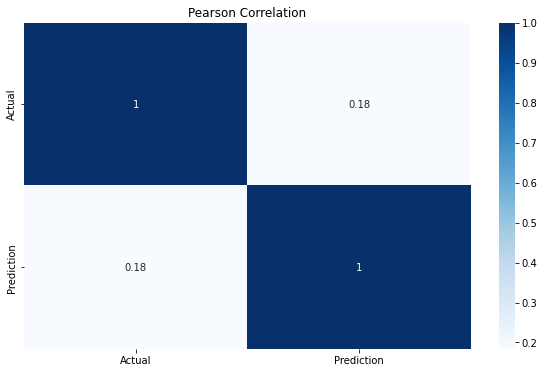

In [29]:
#heatmap correlation
plt.figure(figsize = (10,6))
sns.heatmap(prediction.corr(), annot = True, cmap = 'Blues')
plt.title("Pearson Correlation")
plt.show()

In [30]:
#check MAE
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred).round(2))

Mean Absolute Error :  0.34


In [31]:
#check MSE
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred).round(2))

Mean Squared Error :  0.38


In [32]:
#check RMSE
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred).round(2)))

Root Mean Squared Error :  0.5830951894845301


In [33]:
#check r2 score 
print('r2_score : ', metrics.r2_score(y_test, y_pred))

r2_score :  0.009783582867924467


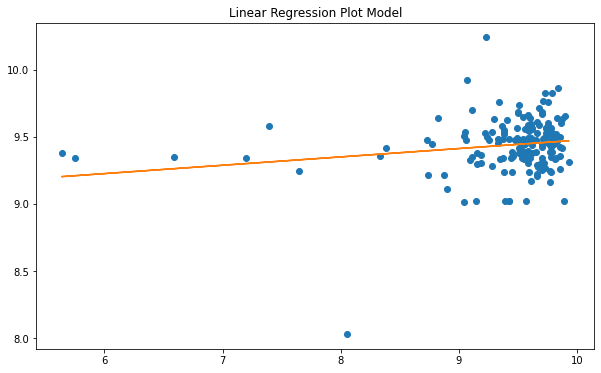

In [34]:
#visualization model
x = y_test
y = y_pred

plt.figure(figsize = (10,6))
plt.title("Linear Regression Plot Model")
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b)

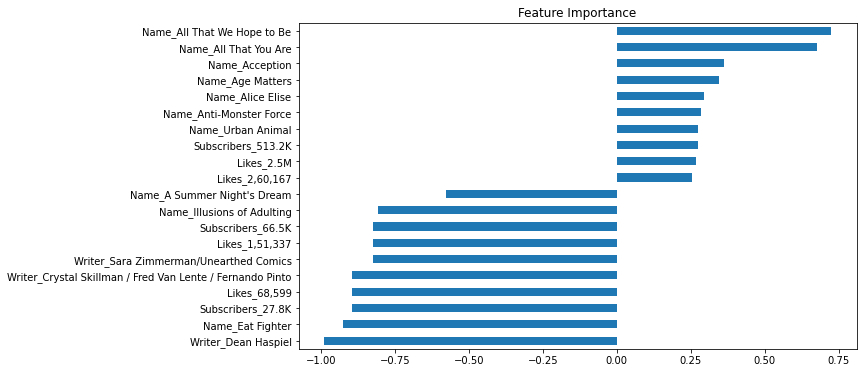

In [35]:
coef = pd.Series(model.coef_, index = X.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.figure(figsize = (10,6))
imp_coef.plot(kind = 'barh')
plt.title("Feature Importance")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


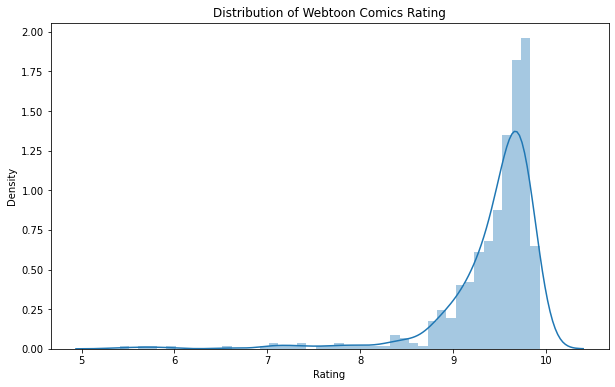

In [36]:
#distribution
plt.figure(figsize = (10,6))
sns.distplot(df3['Rating'])
plt.title("Distribution of Webtoon Comics Rating")
plt.show()